<a href="https://colab.research.google.com/github/MattBizzo/alura-quarentenadados/blob/master/QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [2]:
uri_filmes = "https://raw.githubusercontent.com/MattBizzo/alura-quarentenadados/master/ml-latest-small/movies.csv"
filmes = pd.read_csv(uri_filmes)
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
uri_notas = "https://raw.githubusercontent.com/MattBizzo/alura-quarentenadados/master/ml-latest-small/ratings.csv"
avaliacoes = pd.read_csv(uri_notas)

avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
# Lendo documentação
?avaliacoes.head

In [5]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
avaliacoes_filme_1 = avaliacoes.query("filmeId == 1")

In [7]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [9]:
avaliacoes_filme_1.nota.mean()

3.9209302325581397

In [10]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [11]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.rename(columns={"nota": 'notas'}, inplace=True)
filmes_com_media.head()

,filmeId,titulo,generos,notas
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [12]:
filmes_com_media.sort_values("notas", ascending=False).head(20)

,filmeId,titulo,generos,notas
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


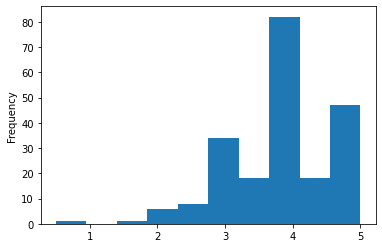

In [13]:
avaliacoes_filme_1["nota"].plot(kind="hist")

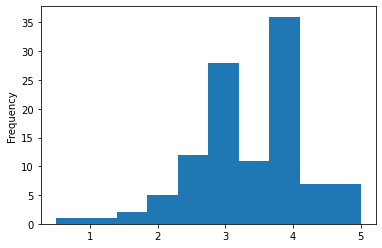

In [14]:
avaliacoes_filme_2 = avaliacoes.query("filmeId == 2")
avaliacoes_filme_2["nota"].plot(kind="hist")

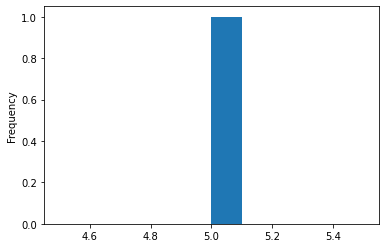

In [15]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind="hist")

In [0]:
# Desafio: arredondar as notas da coluna de notas médias para duas casa decimais

In [0]:
# Desafio: contar o número de aparições de cada gênero

In [0]:
# Desafio: plotar gráfico do resultado anterior

In [23]:
filmes["generos"].str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Desafio: Descobrir a quantidade de gêneros que existem

In [29]:
quantidade_de_generos = len(filmes["generos"].str.get_dummies("|").transpose()) - 1
print(f"Temos {quantidade_de_generos} generos diferentes")

Temos 19 generos diferentes


# Somar colunas

In [0]:
generos_por_filme = filmes["generos"].str.get_dummies("|").sum().sort_values(ascending=False)

In [42]:
generos_por_filme

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [44]:
generos_por_filme.index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

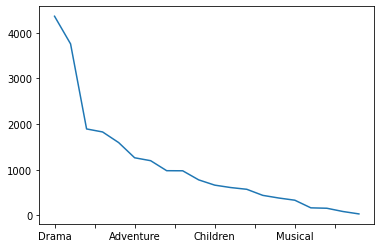

In [54]:
generos_por_filme.plot()

In [0]:
import matplotlib.pyplot as plt


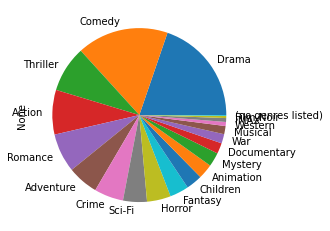

In [55]:
generos_por_filme.plot(kind="pie")

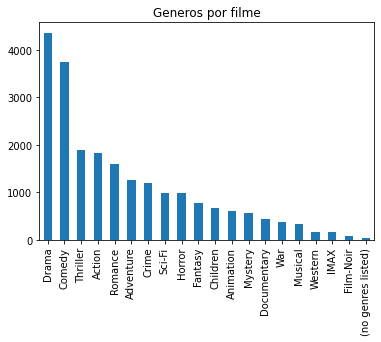

In [63]:
generos_por_filme.plot(kind="bar", title="Generos por filme")

plt.show()

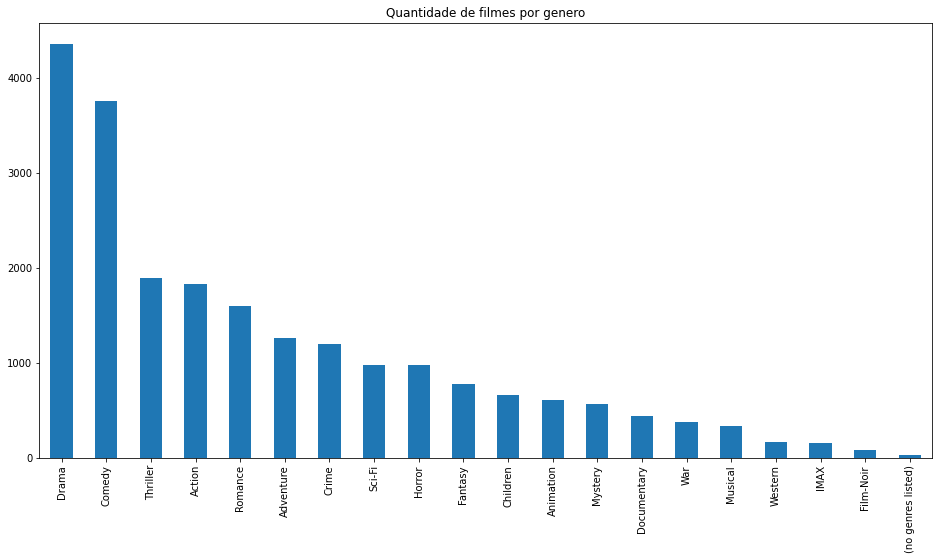

In [70]:
generos_por_filme.plot(kind="bar",
                       title="Quantidade de filmes por genero",
                       figsize=(16,8))

plt.show()

# Aula 2

## Usando o Seaborn

In [71]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


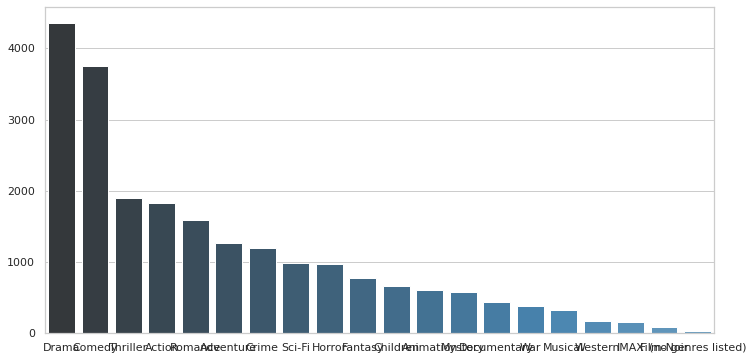

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x=generos_por_filme.index,
            y=generos_por_filme.values,
            palette=sns.color_palette("Blues_d", n_colors=len(generos_por_filme)+10))

plt.show()

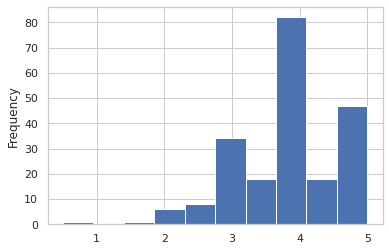

In [91]:
notas_do_filme_1 = avaliacoes.query("filmeId==1")["nota"]
notas_do_filme_1.mean()
notas_do_filme_1.plot(kind="hist")

In [92]:
notas_do_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64